In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('bacteria_list_200.csv')

In [4]:
df.shape

(199, 4)

INFO :- it gives the total information of data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               199 non-null    object
 1   Family             199 non-null    object
 2   Where Found        199 non-null    object
 3   Harmful to Humans  199 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


Describe :-it gives the total aggrigate functions and their outputs and to get object we have to right include object

In [6]:
df.describe()

,Name,Family,Where Found,Harmful to Humans
count,199,199,199,199
unique,194,93,120,3
top,Gardnerella vaginalis,Enterobacteriaceae,Soil,No
freq,2,21,17,102


GIves null values

In [7]:
df.isnull().sum()

Name                 0
Family               0
Where Found          0
Harmful to Humans    0
dtype: int64

In [8]:
df.duplicated().sum()

3

In [9]:
df

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes
...,...,...,...,...
194,Rathayibacter toxicus,Microbacteriaceae,Infected grasses,Yes
195,Simonsiella muelleri,Simonsiellaceae,Animal mucous membranes,No
196,Tepidimonas arfidensis,Comamonadaceae,Thermal springs,No
197,Ulvibacter litoralis,Flavobacteriaceae,Marine environments,No


Label encoding it converts one column to the unique values for each categories

In [10]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [11]:
df['Name']=lr.fit_transform(df['Name'])
df['Family']=lr.fit_transform(df['Family'])
df['Where Found']=lr.fit_transform(df['Where Found'])
df['Harmful to Humans']=lr.fit_transform(df['Harmful to Humans'])

In [12]:
df

,Name,Family,Where Found,Harmful to Humans
0,55,29,60,2
1,158,84,83,2
2,96,45,41,1
3,12,8,84,1
4,36,20,86,2
...,...,...,...,...
194,144,52,57,2
195,156,81,4,1
196,168,21,102,1
197,173,31,63,1


Pair plot it looks for the relation with every column 

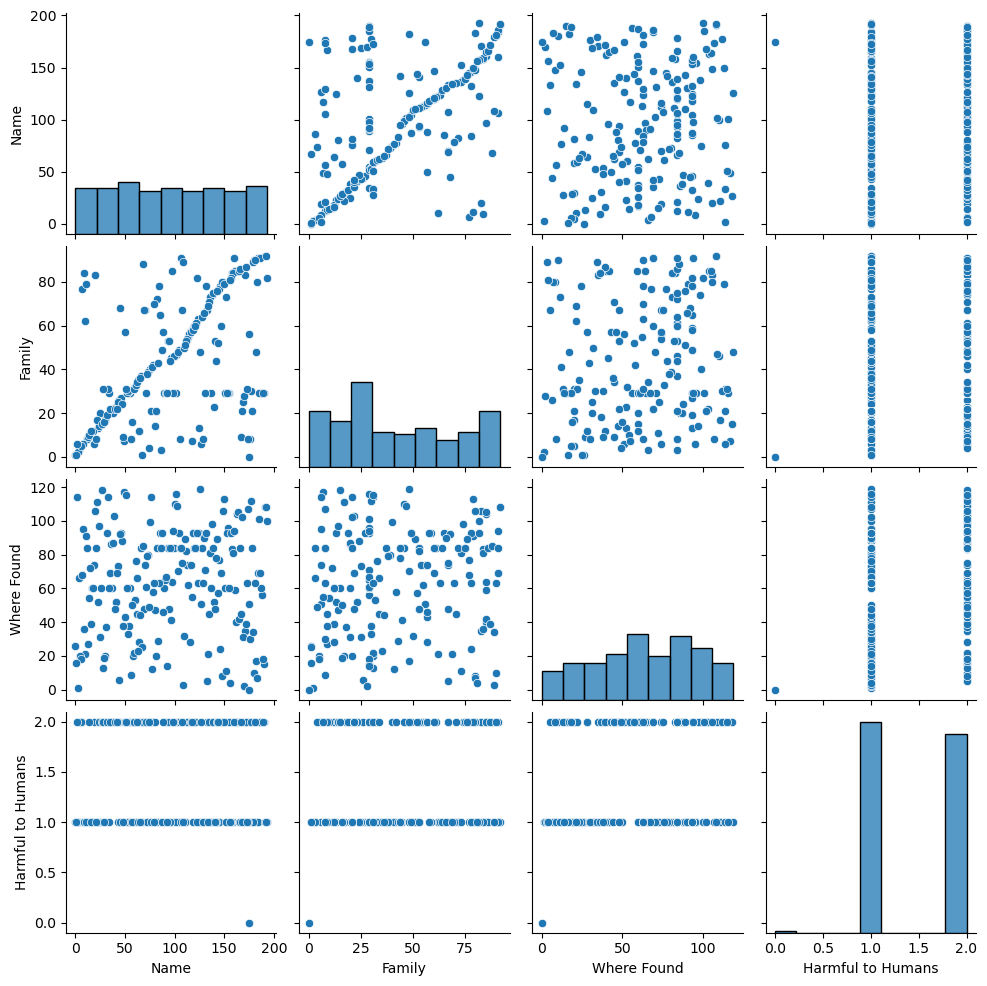

In [13]:
sns.pairplot(df)
plt.show()

Now we will split data in train and test

In [14]:
x=df.drop(['Name','Harmful to Humans'],axis=1)
x

,Family,Where Found
0,29,60
1,84,83
2,45,41
3,8,84
4,20,86
...,...,...
194,52,57
195,81,4
196,21,102
197,31,63


In [15]:
y=df['Harmful to Humans']
y

0      2
1      2
2      1
3      1
4      2
      ..
194    2
195    1
196    1
197    1
198    2
Name: Harmful to Humans, Length: 199, dtype: int32

Spliting is done and we assigne the part of data to it in 80/20

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Standart scalling does standardised disrtibution

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

LOgistic regression is used where we have binary data as target

In [19]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [20]:
y_pred=lr.predict(x_test)
y_pred

array([2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2])

So to see how much error and accuracy is there in our data we import confusion_matrix, accuracy_score from metrics

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 8, 12],
       [15,  5]], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.325

It takes different samples of same dataset and applyes decision tree to it and takes the final output with majority

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [24]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2])

In [25]:
accuracy_score(y_test, y_pred_rf)

0.625

here we see how much the bacteria is harmfull to humans

c:\Users\rosha\OneDrive\Documents\a\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


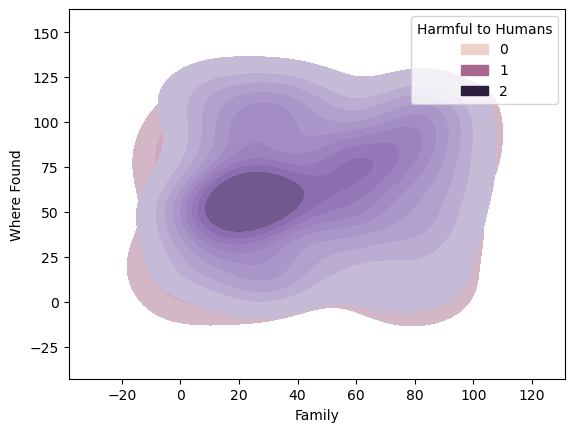

In [34]:
sns.kdeplot(data=df,x='Family',y='Where Found',hue='Harmful to Humans',fill=True)
plt.show()

it gives the the branchs which has tree like structure as it has decision node leaf node

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5,random_state=0)
# dt = DecisionTreeClassifier(max_depth=5,random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)

In [27]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1])

In [28]:
acc = accuracy_score(y_test, y_pred_dt)
acc

0.7

Here is the output with max depth

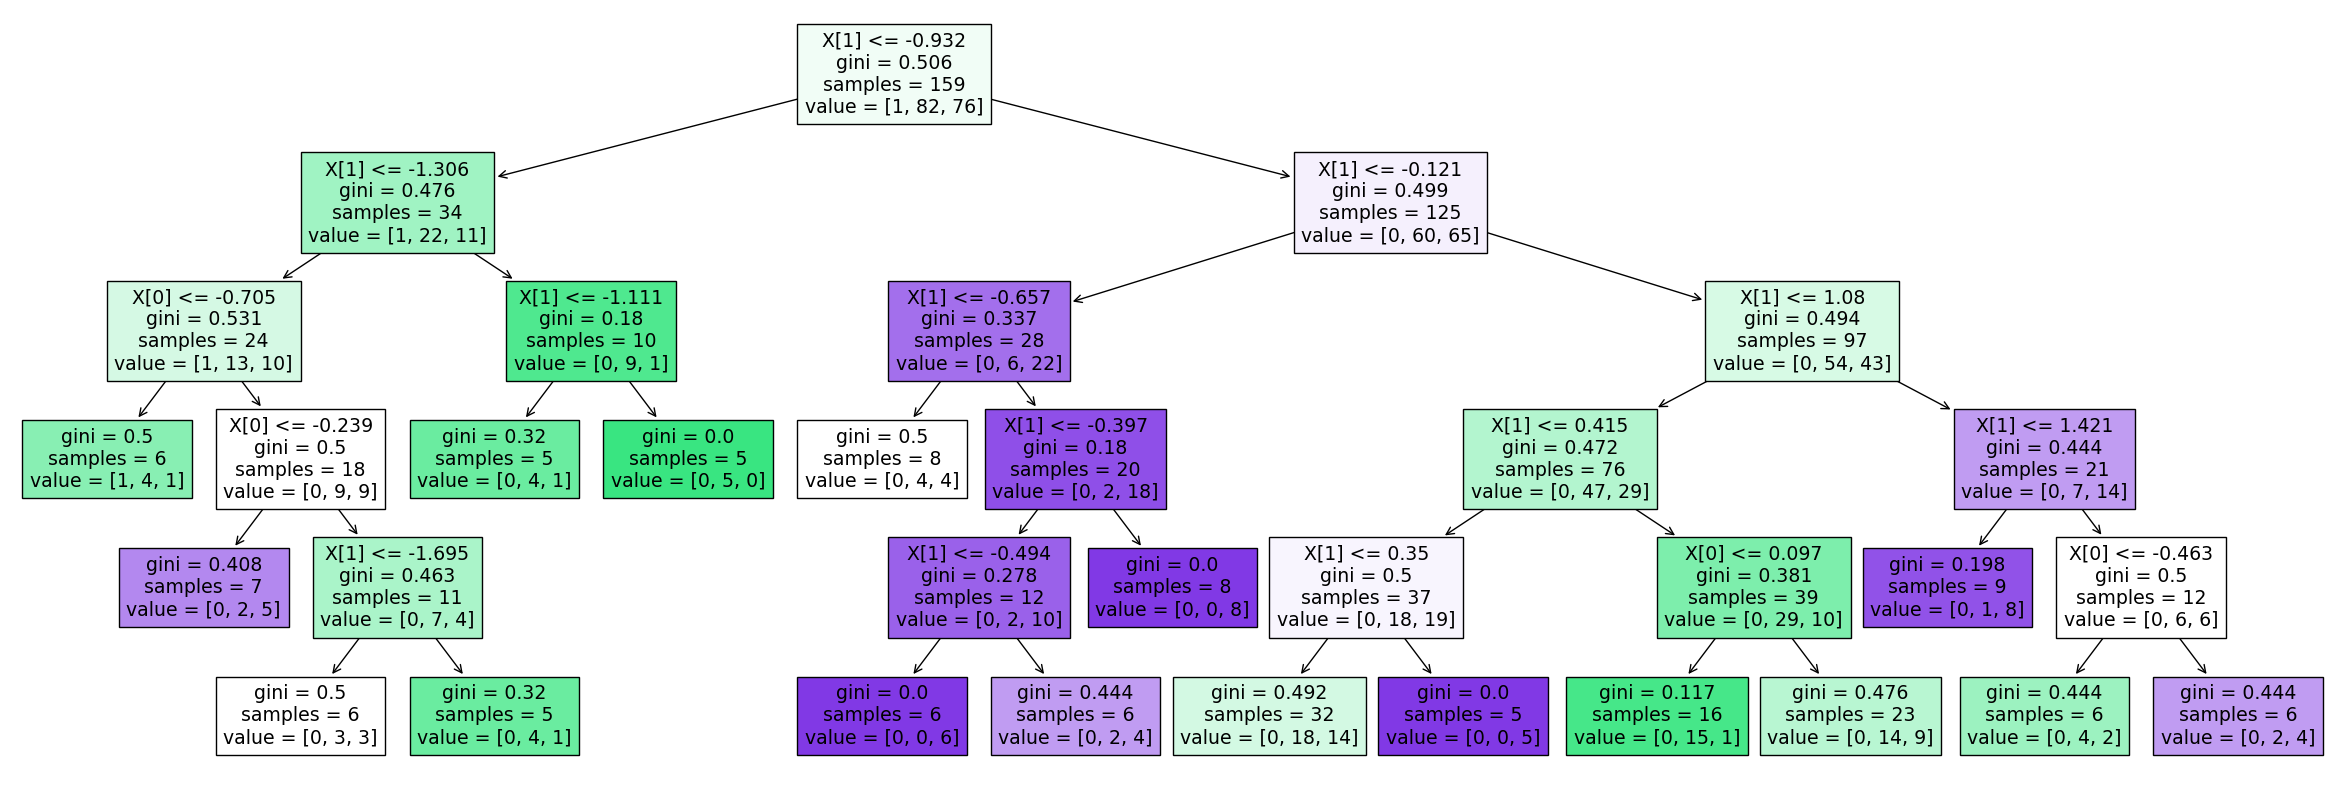

In [29]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(dt,filled=True)
plt.show()